# Codes to pool data of all languages

## Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Preprocessing

In [2]:
# load the original data
survey = pd.read_csv('ECP Survey.csv')
survey.head()

,Timestamp,What gender do you identify with? A quel genre vous identifiez-vous? 您的性別？Cinsiyetiniz?,How old are you? Quel âge avez-vous? 您的年齡？Yaşınız?,Which language do you prefer to use to answer this survey? Quelle langue préférez-vous utiliser pour répondre à ce questionnaire? 您希望使用哪種語言來回答此調查？Bu anketi cevaplamak için hangi dili kullanmayı tercih edersiniz?,How much pain is this person feeling on a scale of 1 to 10?,How stressed do you feel when looking at this photo?,How much pain is this person feeling on a scale of 1 to 10?.1,How stressed do you feel when looking at this photo?.1,How much pain is this person feeling on a scale of 1 to 10?.2,How stressed do you feel when looking at this photo?.2,...,Topluluğumdaki üyelerin sosyal uzaklık ölçütlerini takiben iyi bir iş çıkardıklarına inanıyorum.,Yerel yönetimim tarafından belirlenen kuralların çok katı olduğunu düşünüyorum.,Yerel yönetimim evden çıktığımda maske takmamı istiyor.,Kendimi korumak için evimden ayrıldığımda maske takıyorum.,Başkalarını korumak için evimden ayrıldığımda maske takıyorum.,Evimden ayrılmadan önce ellerimi dezenfekte ediyorum.,Eve geldiğimde ellerimi dezenfekte ediyorum.,Hafif bir öksürüğüm olsaydı hala market alışverişine giderdim.,"Enfeksiyona yakalanma riskinizin olduğunu bilerek, hasta bir arkadaşınıza veya aile üyenize yiyecek teslim etmek için ne kadar istekli olurdunuz?","Enfeksiyona yakalanma riskinizin olduğunu bilerek, hasta bir yabancıya yiyecek vermek için ne kadar istekli olurdunuz?"
0,2020/05/03 6:49:52 am GMT+8,Male / Homme / 男 / Erkek,23,English,1.0,3.0,3.0,5.0,5.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/03 6:53:20 am GMT+8,Male / Homme / 男 / Erkek,22,English,6.0,2.0,7.0,4.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/03 7:42:07 am GMT+8,Female / Femme / 女 / Kadın,23,Türkçe,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,Evet,Evet,Hayır,Evet,Hayır,1.0,3.0
3,2020/05/03 7:47:39 am GMT+8,Male / Homme / 男 / Erkek,63,Türkçe,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,Evet,Evet,Evet,Evet,Hayır,2.0,3.0
4,2020/05/03 7:51:14 am GMT+8,Female / Femme / 女 / Kadın,57,Türkçe,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,1.0,Evet,Evet,Evet,Evet,Hayır,4.0,4.0


In [3]:
print(f'Number of responses: {survey.shape[0]}')

Number of responses: 935


In [4]:
# rename the column names of basic information
survey.rename(columns={
    'Timestamp': 'timestamp',
    'What gender do you identify with? A quel genre vous identifiez-vous? 您的性別？Cinsiyetiniz?': 'gender',
    'How old are you? Quel âge avez-vous? 您的年齡？Yaşınız?': 'age',
    'Which language do you prefer to use to answer this survey? Quelle langue préférez-vous utiliser pour répondre à ce questionnaire? 您希望使用哪種語言來回答此調查？Bu anketi cevaplamak için hangi dili kullanmayı tercih edersiniz?': 'language'
}, inplace=True)
# convert the answer to just english
survey.gender = survey.gender.apply(lambda x: x[0])
survey.language = survey.language.map({'English': 'English', 'Français': 'French', '中文': 'Chinese', 'Türkçe': 'Turkish'})
survey.head()

,timestamp,gender,age,language,How much pain is this person feeling on a scale of 1 to 10?,How stressed do you feel when looking at this photo?,How much pain is this person feeling on a scale of 1 to 10?.1,How stressed do you feel when looking at this photo?.1,How much pain is this person feeling on a scale of 1 to 10?.2,How stressed do you feel when looking at this photo?.2,...,Topluluğumdaki üyelerin sosyal uzaklık ölçütlerini takiben iyi bir iş çıkardıklarına inanıyorum.,Yerel yönetimim tarafından belirlenen kuralların çok katı olduğunu düşünüyorum.,Yerel yönetimim evden çıktığımda maske takmamı istiyor.,Kendimi korumak için evimden ayrıldığımda maske takıyorum.,Başkalarını korumak için evimden ayrıldığımda maske takıyorum.,Evimden ayrılmadan önce ellerimi dezenfekte ediyorum.,Eve geldiğimde ellerimi dezenfekte ediyorum.,Hafif bir öksürüğüm olsaydı hala market alışverişine giderdim.,"Enfeksiyona yakalanma riskinizin olduğunu bilerek, hasta bir arkadaşınıza veya aile üyenize yiyecek teslim etmek için ne kadar istekli olurdunuz?","Enfeksiyona yakalanma riskinizin olduğunu bilerek, hasta bir yabancıya yiyecek vermek için ne kadar istekli olurdunuz?"
0,2020/05/03 6:49:52 am GMT+8,M,23,English,1.0,3.0,3.0,5.0,5.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/03 6:53:20 am GMT+8,M,22,English,6.0,2.0,7.0,4.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/03 7:42:07 am GMT+8,F,23,Turkish,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,Evet,Evet,Hayır,Evet,Hayır,1.0,3.0
3,2020/05/03 7:47:39 am GMT+8,M,63,Turkish,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,Evet,Evet,Evet,Evet,Hayır,2.0,3.0
4,2020/05/03 7:51:14 am GMT+8,F,57,Turkish,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,1.0,Evet,Evet,Evet,Evet,Hayır,4.0,4.0


## Pooling

In [5]:
# get the specific parts for each language
english_part = survey[survey.language == 'English'].iloc[:, np.r_[0:4, 4:59]]
french_part = survey[survey.language == 'French'].iloc[:, np.r_[0:4, 59:114]]
chinese_part = survey[survey.language == 'Chinese'].iloc[:, np.r_[0:4, 114:169]]
turkish_part = survey[survey.language == 'Turkish'].iloc[:, np.r_[0:4, 169:224]]
english_part.head()

,timestamp,gender,age,language,How much pain is this person feeling on a scale of 1 to 10?,How stressed do you feel when looking at this photo?,How much pain is this person feeling on a scale of 1 to 10?.1,How stressed do you feel when looking at this photo?.1,How much pain is this person feeling on a scale of 1 to 10?.2,How stressed do you feel when looking at this photo?.2,...,I believe that members in my community are doing a good job following social distancing measures.,I think that the social and physical distancing rules set in place by my local government are too strict.,My local government requires me to wear a mask when I leave the house.,I wear a mask when I leave my home to protect myself.,I wear a mask when I leave my home to protect others.,I disinfect my hands before leaving my home.,I disinfect my hands when coming home.,I would still go grocery shopping if I had a slight cough.,"Would you be willing to deliver groceries to a sick friend or family member, knowing that there is a risk you may get infected?","Would you be willing to to deliver groceries to a sick stranger, knowing that there is a risk you may get infected?"
0,2020/05/03 6:49:52 am GMT+8,M,23,English,1.0,3.0,3.0,5.0,5.0,9.0,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0
1,2020/05/03 6:53:20 am GMT+8,M,22,English,6.0,2.0,7.0,4.0,7.0,5.0,...,1.0,4.0,Yes,Yes,Yes,No,Yes,Yes,2.0,3.0
9,2020/05/03 3:53:12 pm GMT+8,F,22,English,6.0,1.0,6.0,2.0,7.0,3.0,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,1.0,1.0
43,2020/05/03 7:35:55 pm GMT+8,M,28,English,1.0,1.0,2.0,3.0,7.0,7.0,...,1.0,5.0,Yes,Yes,Yes,Yes,Yes,No,2.0,3.0
64,2020/05/03 8:38:20 pm GMT+8,M,32,English,1.0,1.0,3.0,5.0,10.0,7.0,...,1.0,5.0,No,No,No,No,Yes,No,1.0,3.0


In [6]:
# create index to question dictionary for future convenience
questions = english_part.columns[4:]
i_to_q_dict = {f'q_{i}': q for i, q in enumerate(questions)}

In [7]:
# just a pandas dataframe version of the same thing
i_to_q = pd.DataFrame.from_dict(i_to_q_dict, orient='index')
i_to_q.head()

,0
q_0,How much pain is this person feeling on a scal...
q_1,How stressed do you feel when looking at this ...
q_2,How much pain is this person feeling on a scal...
q_3,How stressed do you feel when looking at this ...
q_4,How much pain is this person feeling on a scal...


In [8]:
# rename questions so that they can be easily concatenated
english_part.rename(columns={q: f'q_{i}' for i, q in enumerate(english_part.columns[4:])}, inplace=True)
french_part.rename(columns={q: f'q_{i}' for i, q in enumerate(french_part.columns[4:])}, inplace=True)
chinese_part.rename(columns={q: f'q_{i}' for i, q in enumerate(chinese_part.columns[4:])}, inplace=True)
turkish_part.rename(columns={q: f'q_{i}' for i, q in enumerate(turkish_part.columns[4:])}, inplace=True)
english_part.head()

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_45,q_46,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54
0,2020/05/03 6:49:52 am GMT+8,M,23,English,1.0,3.0,3.0,5.0,5.0,9.0,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0
1,2020/05/03 6:53:20 am GMT+8,M,22,English,6.0,2.0,7.0,4.0,7.0,5.0,...,1.0,4.0,Yes,Yes,Yes,No,Yes,Yes,2.0,3.0
9,2020/05/03 3:53:12 pm GMT+8,F,22,English,6.0,1.0,6.0,2.0,7.0,3.0,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,1.0,1.0
43,2020/05/03 7:35:55 pm GMT+8,M,28,English,1.0,1.0,2.0,3.0,7.0,7.0,...,1.0,5.0,Yes,Yes,Yes,Yes,Yes,No,2.0,3.0
64,2020/05/03 8:38:20 pm GMT+8,M,32,English,1.0,1.0,3.0,5.0,10.0,7.0,...,1.0,5.0,No,No,No,No,Yes,No,1.0,3.0


### Fix some answers

#### Correct scaling of COVID questions in French part

In [9]:
dict_map = { 0.0:1.0, 1.0:2.0, 2.0:2.0, 3.0:3.0, 4.0:3.0, 5.0:4.0 }
q_to_correct = ['q_54', 'q_53', 'q_46', 'q_45', 'q_43', 'q_42', 'q_41', 'q_40'] # list of Q to correct
french_part[q_to_correct] = french_part[q_to_correct].stack().map(dict_map).unstack()
print(np.unique(french_part[q_to_correct].values))
french_part[q_to_correct].head()

[1. 2. 3. 4.]


,q_54,q_53,q_46,q_45,q_43,q_42,q_41,q_40
10,3.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0
81,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0
82,4.0,4.0,3.0,2.0,1.0,1.0,1.0,3.0
84,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0
85,4.0,4.0,4.0,3.0,1.0,2.0,1.0,1.0


#### Convert the answer to "people you meet per week" to the format in English

In [10]:
french_range_map = { '0': '0', '1-2': '1-2', '3-5': '3-5', '5-10': '5-10', 'Plus de 10': '10+' }

french_part.iloc[:, 48] = french_part.iloc[:, 48].map(french_range_map)
french_part.iloc[:, 48]

10       0
81       0
82     1-2
84     10+
85     1-2
      ... 
922    1-2
923    1-2
925      0
929    1-2
934    1-2
Name: q_44, Length: 270, dtype: object

#### Convert the answer to True/False questions to the format in English

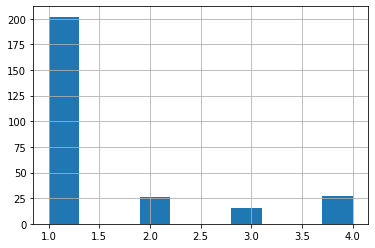

In [11]:
# it seems like for the turkish version of "My local government requires me ..."
# the answers are in linear scale (It's yes/no for other languages).
# I guess we can map 1 and 2 to Yes and 3 and 4 to No, but I'm not sure.
turkish_part.iloc[:, 51].hist()

In [12]:
french_tf_map = { 'Oui': 'Yes', 'Non': 'No' }
chinese_tf_map = { '是': 'Yes', '否': 'No' }
turkish_tf_map = { 'Evet': 'Yes', 'Hayır': 'No' }

french_part.iloc[:, 51:57] = french_part.iloc[:, 51:57].applymap(lambda x: french_tf_map[x])
chinese_part.iloc[:, 51:57] = chinese_part.iloc[:, 51:57].applymap(lambda x: chinese_tf_map[x])
turkish_part.iloc[:, 52:57] = turkish_part.iloc[:, 52:57].applymap(lambda x: turkish_tf_map[x])

turkish_special_map = { 1.0: 'Yes', 2.0: 'Yes', 3.0: 'No', 4.0: 'No' }
turkish_part.iloc[:, 51] = turkish_part.iloc[:, 51].map(turkish_special_map)

#### Fix incorrectly typed ages in Chinese part

In [13]:
# we'll have to remove this
chinese_part[chinese_part.age < 10]

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_45,q_46,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54
445,2020/05/04 6:39:23 pm GMT+8,F,2,Chinese,4.0,3.0,7.0,5.0,8.0,4.0,...,2.0,4.0,No,Yes,Yes,No,Yes,No,2.0,4.0


In [14]:
chinese_part.drop([445], inplace=True)
chinese_part[chinese_part.age < 10]

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_45,q_46,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54


In [15]:
# they typed their birth year
chinese_part[chinese_part.age > 100]

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_45,q_46,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54
390,2020/05/04 4:24:54 pm GMT+8,F,1976,Chinese,4.0,3.0,7.0,7.0,9.0,10.0,...,3.0,2.0,Yes,Yes,Yes,No,Yes,No,1.0,2.0
477,2020/05/04 7:57:55 pm GMT+8,M,1963,Chinese,1.0,1.0,3.0,1.0,4.0,2.0,...,4.0,1.0,Yes,No,Yes,No,No,Yes,1.0,1.0


In [16]:
chinese_part.loc[chinese_part.age > 100, 'age'] = 2020 - chinese_part[chinese_part.age > 100].age
chinese_part[chinese_part.age > 100]

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_45,q_46,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54


### Compute EQ and SQ results

In [17]:
def compute_eq_sq(df):
    # adapt scores
    map_pos = {1.0:2.0, 2.0:1.0, 3.0:0.0, 4.0:0.0}
    map_neg = {1.0:0.0, 2.0:0.0, 3.0:1.0, 4.0:2.0}
    q_pos = ['q_21', 'q_22', 'q_24', 'q_26', 'q_29', 'q_31', 'q_33', 'q_34', 'q_36', 'q_37', 'q_39', 'q_40'] # list of pos Qs
    q_neg = ['q_23', 'q_25', 'q_27', 'q_28', 'q_30', 'q_32', 'q_35', 'q_38'] # list of neg Qs
    df[q_pos] = df[q_pos].stack().map(map_pos).unstack()
    df[q_neg] = df[q_neg].stack().map(map_neg).unstack()

    # calculate EQ score
    q_EQ = ['q_21', 'q_22', 'q_23', 'q_24', 'q_25', 'q_26', 'q_27', 'q_28', 'q_29', 'q_30']
    df['EQ_score'] = df[q_EQ].sum(axis=1)

    # calculate SQ score
    q_SQ = ['q_31', 'q_32', 'q_33', 'q_34', 'q_35', 'q_36', 'q_37', 'q_38', 'q_39', 'q_40']
    df['SQ_score'] = df[q_SQ].sum(axis=1)
    
    return df

In [18]:
english_part = compute_eq_sq(english_part)
french_part = compute_eq_sq(french_part)
chinese_part = compute_eq_sq(chinese_part)
turkish_part = compute_eq_sq(turkish_part)

### Put all fixed dataframes together

In [19]:
pooled = pd.concat([english_part, french_part, chinese_part, turkish_part])
pooled.head()

,timestamp,gender,age,language,q_0,q_1,q_2,q_3,q_4,q_5,...,q_47,q_48,q_49,q_50,q_51,q_52,q_53,q_54,EQ_score,SQ_score
0,2020/05/03 6:49:52 am GMT+8,M,23,English,1.0,3.0,3.0,5.0,5.0,9.0,...,Yes,Yes,Yes,No,Yes,No,2.0,3.0,7.0,4.0
1,2020/05/03 6:53:20 am GMT+8,M,22,English,6.0,2.0,7.0,4.0,7.0,5.0,...,Yes,Yes,Yes,No,Yes,Yes,2.0,3.0,5.0,4.0
9,2020/05/03 3:53:12 pm GMT+8,F,22,English,6.0,1.0,6.0,2.0,7.0,3.0,...,Yes,Yes,Yes,No,Yes,No,1.0,1.0,7.0,9.0
43,2020/05/03 7:35:55 pm GMT+8,M,28,English,1.0,1.0,2.0,3.0,7.0,7.0,...,Yes,Yes,Yes,Yes,Yes,No,2.0,3.0,4.0,8.0
64,2020/05/03 8:38:20 pm GMT+8,M,32,English,1.0,1.0,3.0,5.0,10.0,7.0,...,No,No,No,No,Yes,No,1.0,3.0,5.0,13.0


In [20]:
print(f'The shape of pooled df is: {pooled.shape}')

The shape of pooled df is: (934, 61)


In [21]:
# check if there is any error in the previous steps
pooled.isnull().sum().sum()

0

## Save the result

In [22]:
base_dir = 'data'
os.makedirs(base_dir, exist_ok=True)

In [23]:
# save .csv files for future data analysis
pooled.to_csv(os.path.join(base_dir, 'pooled.csv'))
i_to_q.to_csv(os.path.join(base_dir, 'i_to_q.csv'))

In [24]:
english_part.to_csv(os.path.join(base_dir, 'english_part.csv'))
french_part.to_csv(os.path.join(base_dir, 'french_part.csv'))
chinese_part.to_csv(os.path.join(base_dir, 'chinese_part.csv'))
turkish_part.to_csv(os.path.join(base_dir, 'turkish_part.csv'))

## Some simple analysis

In [25]:
# number of responses
print(f'Number of total responses: {pooled.shape[0]}')
print(f'Number of English responses: {english_part.shape[0]}')
print(f'Number of French responses: {french_part.shape[0]}')
print(f'Number of Chinese responses: {chinese_part.shape[0]}')
print(f'Number of Turkish responses: {turkish_part.shape[0]}')

Number of total responses: 934
Number of English responses: 143
Number of French responses: 270
Number of Chinese responses: 251
Number of Turkish responses: 270


In [26]:
all_df = [pooled, english_part, french_part, chinese_part, turkish_part]
titles = ['All', 'English', 'French', 'Chinese', 'Turkish']

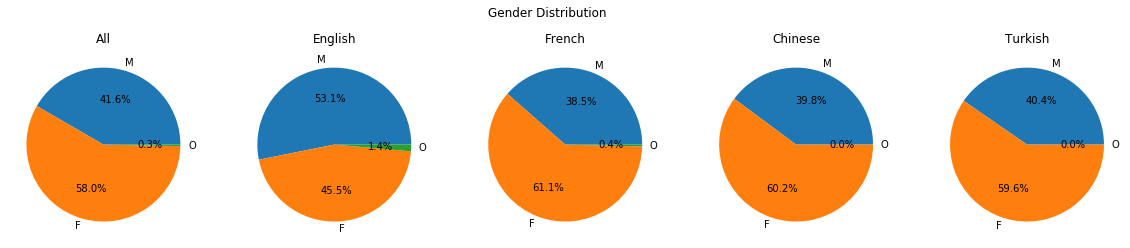

In [27]:
# gender
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Gender Distribution')
labels = ['M', 'F', 'O']

for idx, df in enumerate(all_df):
    sizes = [sum(df.gender == 'M'), sum(df.gender == 'F'), sum(df.gender == 'O')]
    axs[idx].pie(sizes, labels=labels, autopct='%1.1f%%')
    axs[idx].set_title(titles[idx])

plt.show()

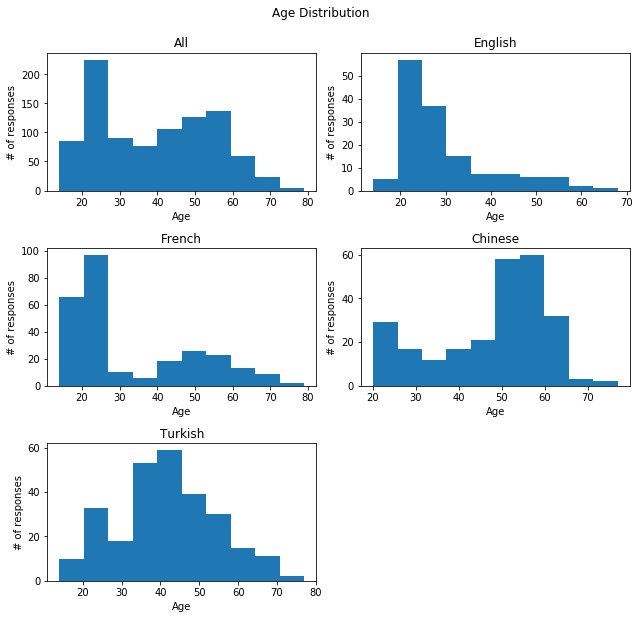

In [28]:
# age
fig, axs = plt.subplots(3, 2, figsize=(9, 9))
fig.suptitle('Age Distribution')

axs = axs.ravel()

for idx, df in enumerate(all_df):
    axs[idx].hist(df.age)
    axs[idx].set_title(titles[idx])
    axs[idx].set_xlabel('Age')
    axs[idx].set_ylabel('# of responses')

axs[-1].axis('off')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()